# 岭回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.uniform(-3., 3. , size=100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0,1,size=100)

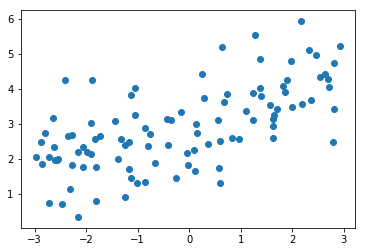

In [12]:
plt.scatter(x,y)
# plt.ylabel('Y label', rotation=0)
# plt.yticks(rotation=-90,fontsize = 8)
plt.show()

In [13]:
from sklearn.linear_model.base import LinearRegression
from sklearn.metrics.scorer import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing.data import PolynomialFeatures
from sklearn.preprocessing.data import StandardScaler

def PolynomialRegression(degree):
    return Pipeline(
        [
            ('poly', PolynomialFeatures(degree=degree)),
            ('std_scaler', StandardScaler()),
            ('lin_reg',LinearRegression())
        ]
    )


In [14]:
from sklearn.model_selection._split import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [15]:
poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

/usr/local/seamonster/MachineLearningClassicAlgorithmEnv/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


167.94010863221607

预测测试数据集时均方误差值这么大，显然是过拟合了

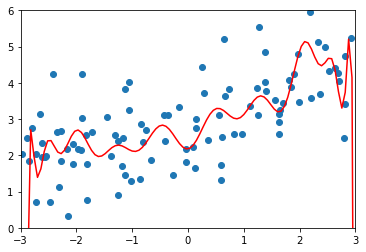

In [16]:
# 把拟合的曲线画出来
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3,3,0,6])
plt.show()

In [17]:
# 把画图抽出来作为一个方法
def plot_model(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)

    plt.scatter(x,y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3,3,0,6])
    plt.show()

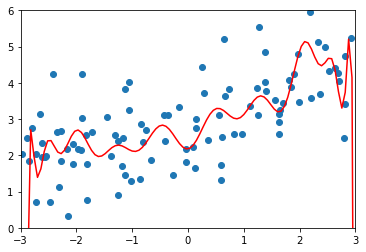

In [18]:
plot_model(poly_reg)

## 使用岭回归调整过拟合情况

In [19]:
from sklearn.linear_model.ridge import Ridge

# 超参数α
ridge = Ridge(alpha=1)

In [20]:
# 封装一个使用岭回归的管道
def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('ridge_reg',Ridge(alpha=alpha))
    ])

### α取0.0001

In [21]:
# 使用岭回归后的（对测试集的）均方误差是多少呢？
ridge1_reg =RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.3233492753942235

均方误差大幅下降了超过90%

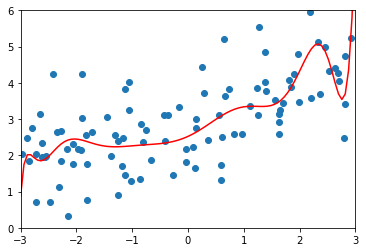

In [22]:
# 使用岭回归后的拟合曲线是什么样呢？
plot_model(ridge1_reg)

### α取1

In [24]:
ridge2_reg =RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.188875930421847

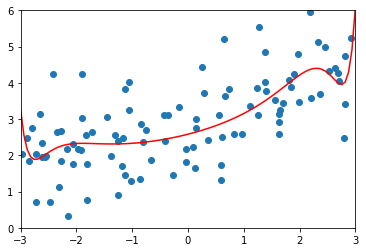

In [25]:
# 绘制拟合曲线
plot_model(ridge2_reg)

### α取100

In [26]:
ridge3_reg =RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.3196456113086197

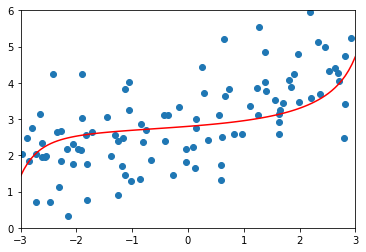

In [27]:
plot_model(ridge3_reg)

### α取一个非常大的数

In [28]:
ridge4_reg =RidgeRegression(20, 1e8)
ridge4_reg.fit(X_train, y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

1.8408891248481221

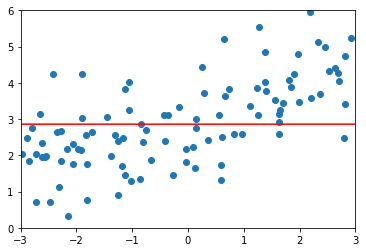

In [29]:
plot_model(ridge4_reg)